Library

In [2]:
import pandas as pd
import numpy as np

import random
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras import layers, Sequential

import seaborn as sns
#from sklearn.preprocessing import Imputer

#from sklearn.impute import KNNImputer
#import nltk
#from nltk.tokenize import word_tokenize

In [3]:
train_data = pd.read_csv('train_data.csv')
train_data

,id,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,...,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
0,1,5,0.0,0.0,0.0,0,0.0,0.0,1,0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
1,2,117,1.0,4.0,3.0,NaN,5.0,2.0,9,19,...,3.0,13,9.0,15,3.0,NaN,13,3,1,0
2,3,30,1.0,1.0,5.0,8,3.0,2.0,2,2,...,1.0,5,1.0,1,1.0,0.0,0,0,0,0
3,4,3,0.0,0.0,0.0,0,0.0,0.0,0,1,...,0.0,NaN,0.0,0,0.0,0.0,NaN,0,0,0
4,5,263,6.0,8.0,8.0,NaN,26.0,1.0,21,35,...,10.0,NaN,5.0,49,26.0,24.0,23,4,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,3616,131,2.0,1.0,9.0,27,4.0,0.0,6,13,...,10.0,2,0.0,10,2.0,3.0,4,1,3,1
3616,3617,7,0.0,0.0,1.0,0,0.0,0.0,2,2,...,0.0,0,1.0,1,0.0,1.0,1,1,0,0
3617,3618,3,0.0,0.0,NaN,0,0.0,0.0,0,1,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
3618,3619,47,3.0,0.0,0.0,12,1.0,3.0,3,5,...,2.0,11,2.0,9,2.0,3.0,3,4,1,0


Data Preprocessing

In [4]:
train_data.isnull().sum()

id          0
word-1     11
word-2     16
word-3     14
word-4     23
word-5     24
word-6     23
word-7     20
word-8     21
word-9     34
word-10    20
word-11    18
word-12    20
word-13    23
word-14    13
word-15    24
word-16    11
word-17    20
word-18    20
word-19    34
word-20    14
word-21    11
word-22    10
word-23    15
word-24     9
word-25    17
word-26    13
word-27    10
word-28    11
word-29    16
word-30    17
word-31    11
word-32    10
word-33    18
word-34    11
word-35    19
word-36    13
word-37    14
word-38    12
word-39     6
word-40     2
Result      0
dtype: int64

In [5]:
#Fill missing value
#imputer = KNNImputer(n_neighbors=10, weights="uniform")
#train_data = pd.DataFrame(Imputer.fit_transform(train_data, ))
#train_data.head()
for column in train_data.columns[1:41]:
  train_data[column] = train_data[column].fillna(train_data[column].mode()[0])

In [6]:
train_data.isnull().sum()

id         0
word-1     0
word-2     0
word-3     0
word-4     0
word-5     0
word-6     0
word-7     0
word-8     0
word-9     0
word-10    0
word-11    0
word-12    0
word-13    0
word-14    0
word-15    0
word-16    0
word-17    0
word-18    0
word-19    0
word-20    0
word-21    0
word-22    0
word-23    0
word-24    0
word-25    0
word-26    0
word-27    0
word-28    0
word-29    0
word-30    0
word-31    0
word-32    0
word-33    0
word-34    0
word-35    0
word-36    0
word-37    0
word-38    0
word-39    0
word-40    0
Result     0
dtype: int64

In [7]:
train_data

,id,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,...,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
0,1,5,0.0,0.0,0.0,0,0.0,0.0,1,0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
1,2,117,1.0,4.0,3.0,0,5.0,2.0,9,19,...,3.0,13,9.0,15,3.0,0.0,13,3,1,0
2,3,30,1.0,1.0,5.0,8,3.0,2.0,2,2,...,1.0,5,1.0,1,1.0,0.0,0,0,0,0
3,4,3,0.0,0.0,0.0,0,0.0,0.0,0,1,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
4,5,263,6.0,8.0,8.0,0,26.0,1.0,21,35,...,10.0,0,5.0,49,26.0,24.0,23,4,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,3616,131,2.0,1.0,9.0,27,4.0,0.0,6,13,...,10.0,2,0.0,10,2.0,3.0,4,1,3,1
3616,3617,7,0.0,0.0,1.0,0,0.0,0.0,2,2,...,0.0,0,1.0,1,0.0,1.0,1,1,0,0
3617,3618,3,0.0,0.0,0.0,0,0.0,0.0,0,1,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
3618,3619,47,3.0,0.0,0.0,12,1.0,3.0,3,5,...,2.0,11,2.0,9,2.0,3.0,3,4,1,0


In [8]:
#ini cell ngapain?

for column in train_data.columns[0:42]:
    train_data = train_data[pd.to_numeric(train_data[column], errors='coerce').notnull()]

In [9]:
train_data

,id,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,...,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
0,1,5,0.0,0.0,0.0,0,0.0,0.0,1,0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
1,2,117,1.0,4.0,3.0,0,5.0,2.0,9,19,...,3.0,13,9.0,15,3.0,0.0,13,3,1,0
2,3,30,1.0,1.0,5.0,8,3.0,2.0,2,2,...,1.0,5,1.0,1,1.0,0.0,0,0,0,0
3,4,3,0.0,0.0,0.0,0,0.0,0.0,0,1,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
4,5,263,6.0,8.0,8.0,0,26.0,1.0,21,35,...,10.0,0,5.0,49,26.0,24.0,23,4,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,3616,131,2.0,1.0,9.0,27,4.0,0.0,6,13,...,10.0,2,0.0,10,2.0,3.0,4,1,3,1
3616,3617,7,0.0,0.0,1.0,0,0.0,0.0,2,2,...,0.0,0,1.0,1,0.0,1.0,1,1,0,0
3617,3618,3,0.0,0.0,0.0,0,0.0,0.0,0,1,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
3618,3619,47,3.0,0.0,0.0,12,1.0,3.0,3,5,...,2.0,11,2.0,9,2.0,3.0,3,4,1,0


In [10]:
train_data.isnull().sum()

id         0
word-1     0
word-2     0
word-3     0
word-4     0
word-5     0
word-6     0
word-7     0
word-8     0
word-9     0
word-10    0
word-11    0
word-12    0
word-13    0
word-14    0
word-15    0
word-16    0
word-17    0
word-18    0
word-19    0
word-20    0
word-21    0
word-22    0
word-23    0
word-24    0
word-25    0
word-26    0
word-27    0
word-28    0
word-29    0
word-30    0
word-31    0
word-32    0
word-33    0
word-34    0
word-35    0
word-36    0
word-37    0
word-38    0
word-39    0
word-40    0
Result     0
dtype: int64

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3580 entries, 0 to 3619
Data columns (total 42 columns):
id         3580 non-null int64
word-1     3580 non-null object
word-2     3580 non-null float64
word-3     3580 non-null float64
word-4     3580 non-null float64
word-5     3580 non-null object
word-6     3580 non-null float64
word-7     3580 non-null float64
word-8     3580 non-null object
word-9     3580 non-null object
word-10    3580 non-null object
word-11    3580 non-null object
word-12    3580 non-null float64
word-13    3580 non-null object
word-14    3580 non-null object
word-15    3580 non-null float64
word-16    3580 non-null float64
word-17    3580 non-null object
word-18    3580 non-null object
word-19    3580 non-null object
word-20    3580 non-null float64
word-21    3580 non-null float64
word-22    3580 non-null object
word-23    3580 non-null float64
word-24    3580 non-null object
word-25    3580 non-null float64
word-26    3580 non-null float64
word-27    3580 n

In [12]:
train_data = pd.DataFrame(train_data).astype(np.int64)

In [13]:
train_data.describe()

,id,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,...,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
count,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,...,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000
mean,1814.126816,218.741899,1.717318,1.272067,1.892179,9.409777,2.976257,1.387989,4.678771,6.700838,...,1.744693,6.457542,1.348324,6.108101,37.979050,3.192737,117.375698,1.972626,2.455307,0.288827
std,1044.101260,9829.886848,3.683403,2.726266,4.079826,16.174135,5.962652,2.565165,7.404917,12.808764,...,3.370013,11.525117,2.768150,9.568523,2171.766088,6.008353,6891.367403,3.623729,4.434927,0.453281
min,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,910.750000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1815.500000,28.000000,1.000000,0.000000,1.000000,4.000000,1.000000,0.000000,2.000000,3.000000,...,1.000000,3.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2719.250000,62.000000,2.000000,1.000000,2.000000,11.000000,3.000000,2.000000,6.000000,7.000000,...,2.000000,7.000000,2.000000,7.000000,2.000000,3.000000,2.000000,2.000000,3.000000,1.000000
max,3620.000000,588184.000000,81.000000,66.000000,117.000000,305.000000,89.000000,31.000000,135.000000,267.000000,...,66.000000,210.000000,33.000000,132.000000,129945.000000,108.000000,412334.000000,63.000000,70.000000,1.000000


In [17]:
#plt.boxplot(train_data[1])

In [18]:
#plt.boxplot(train_data[36])

In [19]:
#plt.boxplot(train_data[38])

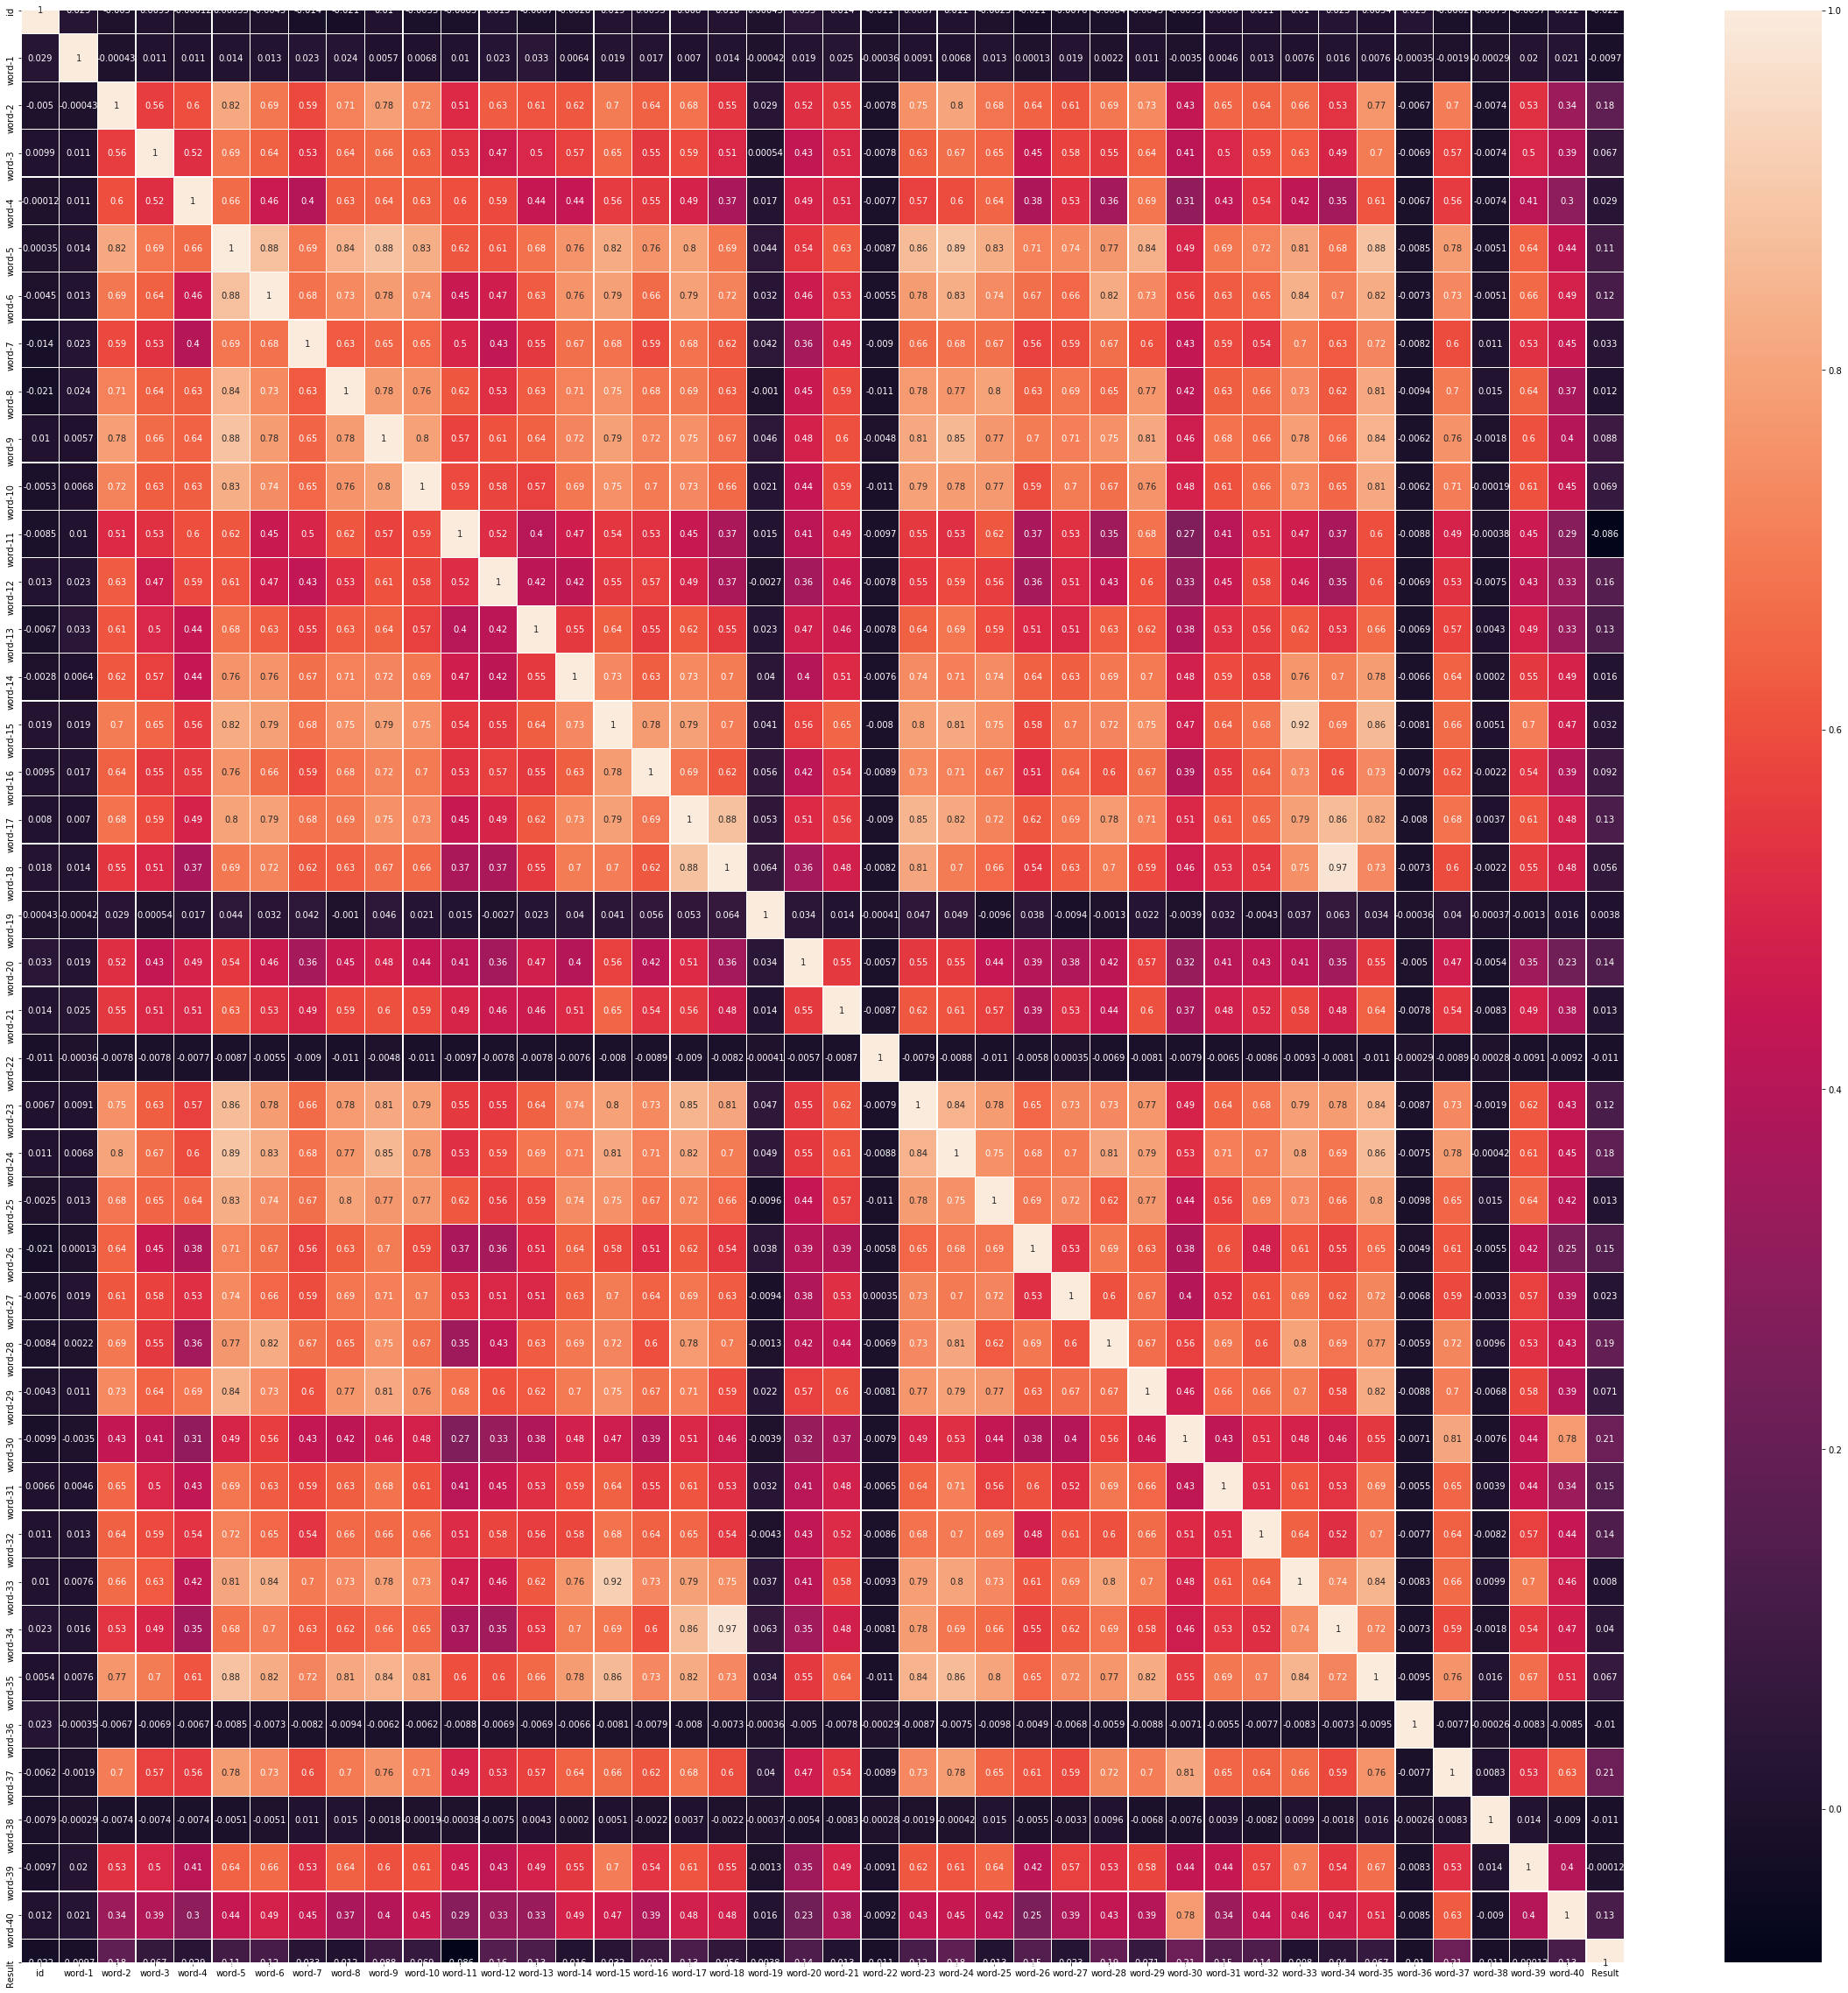

In [20]:
plt.figure(figsize = (41,41))
ax = sns.heatmap(train_data.corr(), annot=True, linewidths=.3)

Normalisasi

Allocate features and label

In [21]:
#train_features = train_data.drop([0,1,36,38,41], axis=1)
train_features = train_data.drop(train_data.columns[[0,1,41]], axis=1)
train_label = train_data[train_data.columns[41]]

In [22]:
train_features

,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,word-11,...,word-31,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40
0,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,4,3,0,5,2,9,19,6,1,...,1,3,13,9,15,3,0,13,3,1
2,1,1,5,8,3,2,2,2,1,1,...,0,1,5,1,1,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,8,8,0,26,1,21,35,10,5,...,6,10,0,5,49,26,24,23,4,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,2,1,9,27,4,0,6,13,10,6,...,2,10,2,0,10,2,3,4,1,3
3616,0,0,1,0,0,0,2,2,0,0,...,0,0,0,1,1,0,1,1,1,0
3617,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3618,3,0,0,12,1,3,3,5,1,1,...,1,2,11,2,9,2,3,3,4,1


In [23]:
train_label.head()

0    0
1    0
2    0
3    0
4    1
Name: Result, dtype: int64

In [24]:
#train_features = np.asarray(train_features).astype(np.int64)
#train_label = np.asarray(train_label).astype(np.int64)

In [49]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(train_features, train_label, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)
#X_train, X_val, y_train, y_val = train_test_split(train_features, train_label, test_size=0.3)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(2864, 39) (358, 39) (2864,) (358,)


In [50]:
# random.seed(50)
# rf = RandomForestRegressor(n_estimators=10)
# rf.fit(X_train, y_train)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [51]:
callbacks = myCallback()

DEFINE MODEL

In [52]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(39,), kernel_initializer='random_normal', name='hidden1'),
    #Dropout(0,2),
    Dense(64, activation='relu', name='hidden2'),
    #Dropout(0,2),
    Dense(1, activation='sigmoid', name='output')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, batch_size=400, epochs=100, validation_data=(X_val,y_val))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 64)                2560      
_________________________________________________________________
hidden2 (Dense)              (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 1)                 65        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
Train on 2864 samples, validate on 358 samples
Epoch 1/100
2864/2864 [==============================] - 0s 162us/sample - loss: 295.7887 - acc: 0.5506 - val_loss: 1.0168 - val_acc: 0.7179
Epoch 2/100
2864/2864 [==============================] - 0s 11us/sample - loss: 6.3630 - acc: 0.6945 - val_loss: 0.7026 - val_acc: 0.5978
Epoch 3/100
2864/2864 [==============================] -

Epoch 54/100
2864/2864 [==============================] - 0s 18us/sample - loss: 0.9187 - acc: 0.9026 - val_loss: 0.2536 - val_acc: 0.9134
Epoch 55/100
2864/2864 [==============================] - 0s 14us/sample - loss: 1.3437 - acc: 0.9047 - val_loss: 0.2526 - val_acc: 0.9078
Epoch 56/100
2864/2864 [==============================] - 0s 18us/sample - loss: 1.0363 - acc: 0.9103 - val_loss: 0.2447 - val_acc: 0.9134
Epoch 57/100
2864/2864 [==============================] - 0s 12us/sample - loss: 2.2522 - acc: 0.9085 - val_loss: 0.2573 - val_acc: 0.9078
Epoch 58/100
2864/2864 [==============================] - 0s 14us/sample - loss: 1.6484 - acc: 0.9082 - val_loss: 0.2583 - val_acc: 0.9078
Epoch 59/100
2864/2864 [==============================] - 0s 13us/sample - loss: 7.5152 - acc: 0.9040 - val_loss: 0.2619 - val_acc: 0.8994
Epoch 60/100
2864/2864 [==============================] - 0s 14us/sample - loss: 12.8575 - acc: 0.8991 - val_loss: 0.2814 - val_acc: 0.8994
Epoch 61/100
2864/2864 [==

In [53]:
model.evaluate(X_test, y_test)

358/358 [==============================] - 0s 49us/sample - loss: 0.3614 - acc: 0.8799


[0.3613946387887667, 0.8798883]

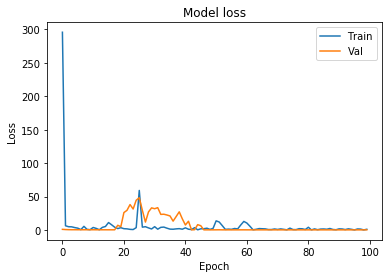

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

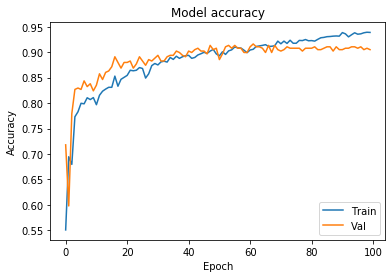

In [55]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Test data

In [56]:
test_data = pd.read_csv('test_data.csv')

In [57]:
test_data.head()

,id,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,...,word-31,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40
0,3621,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3622,42.0,0.0,1.0,1.0,NaN,3.0,3.0,6.0,6.0,...,0.0,2.0,5.0,3.0,6.0,0.0,1.0,0.0,1.0,4.0
2,3623,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,NaN,0.0,0.0,0.0,2.0,0.0
3,3624,33.0,0.0,0.0,0.0,7.0,0.0,1.0,4.0,4.0,...,5.0,1.0,4.0,0.0,5.0,2.0,3.0,3.0,3.0,5.0
4,3625,87.0,0.0,1.0,2.0,16.0,7.0,2.0,12.0,2.0,...,1.0,1.0,4.0,2.0,13.0,4.0,1.0,0.0,0.0,4.0


In [58]:
#fill null data (fac_1 until fac_8) with mode
for column in test_data.columns[1:41]:
  test_data[column] = test_data[column].fillna(test_data[column].mode()[0])

In [59]:
X_test = test_data.drop(['id','word-1'], axis=1)

In [60]:
X_test.isnull().sum()

word-2     0
word-3     0
word-4     0
word-5     0
word-6     0
word-7     0
word-8     0
word-9     0
word-10    0
word-11    0
word-12    0
word-13    0
word-14    0
word-15    0
word-16    0
word-17    0
word-18    0
word-19    0
word-20    0
word-21    0
word-22    0
word-23    0
word-24    0
word-25    0
word-26    0
word-27    0
word-28    0
word-29    0
word-30    0
word-31    0
word-32    0
word-33    0
word-34    0
word-35    0
word-36    0
word-37    0
word-38    0
word-39    0
word-40    0
dtype: int64

In [61]:
predict = model.predict(X_test)

In [62]:
id = pd.DataFrame(test_data['id'], columns=['id'])
predict = pd.DataFrame(predict, columns=['Result'])

In [63]:
predict = predict['Result'].apply(lambda x: 0 if x <0.5 else 1)

In [64]:
submission = pd.concat([id, predict], axis=1)

In [65]:
submission.to_csv('submission.csv', index=False)